<a href="https://colab.research.google.com/github/Settodestridor/IA-aplica-EQ/blob/main/IA_ppgeq_Aula03_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1) Conceitos Fundamentais de Algoritmos de Classificação

Os algoritmos de aprendizagem de máquina costumam possuir parâmetros que podem (e devem!) ser ajustados para maximizar seu desempenho. Para entender o significado destes parâmetros, precisamos antes entender a base matemática por trás destes algoritmos.




##1.1) Dados em forma vetorial



Para aplicação dos algoritmos, vamos considerar que os dados devam estar representados na forma de vetores contendo valores numéricos.

Para os algoritmos de classificação, os dados devem possuir as seguintes informações:

- Valores para os atributos de cada amostra;

- Classe a qual esta amostra pertence.


**Nomenclatura**: Vamos considerar que os atributos de uma dada amostra $i$ sejam armazenados em um vetor $\mathbf{x}_i$. Supondo que existam $D$ atributos, este vetor será da forma

$$
\mathbf{x}_i = (x_{i,1}, x_{i,2}, x_{i,3}, \ldots, x_{i,D})
$$

Considerando que existam $N$ amostras no total, os vetores com os atributos de cada amostra podem ser agrupados em uma matrix $\mathbf{X}$:

$$
\mathbf{X} = (\mathbf{x_1}, \mathbf{x_2}, \ldots, \mathbf{x_N})^T
$$

Assim, essa matriz será um elemento com dimensão $N \times D$.


Para cada amostra $i$, haverá uma classe $y_i$ associada. Considerando que existam $N$ amostras, a classe de cada uma das amostras pode ser agrupada em um vetor $\mathbf{y}$:
$$
\mathbf{y} = (y_1, y_2, y_3, \ldots , y_N)
$$

A não ser que seja especificado de forma diferente, vamos considerar que existam somente duas classes, $y=0$ e $y=1$ (ou seja, classificação binária com as classes normalizadas).



---

**Obs**.: No caso de algoritmos de regressão, $y_i$ é o valor associado com a amostra e não a classe. De modo geral, as etapas descritas aqui são válidas para classificação e regressão, mas será focado no exemplo de classificação!

---






##1.2) Obtenção de Preditores



O objetivo do algoritmo de classificação pode ser expresso como:

*Dado um vetor de atributos $\mathbf{x}_i \in \mathbb{R}^D$, determinar a classe $y_i \in \mathbb{R}$ associada*

Para isso, pode-se utilizar duas abordagens diferentes:

1) **Funções Preditoras**: Encontrar uma função $f: \mathbb{R}^D \rightarrow \mathbb{R}$ que relacione os atributos de entrada $\mathbf{x}_i$ com a classe $y_i$

2) **Modelos Probabilísticos**: Encontar uma distribuição de probabilidade $Pr(y_i|\mathbf{x}_i)$, ou seja, qual a probabilidade de uma amostra pertencer à classe $y_i$ dado que os atributos de entrada são $\mathbf{x}_i$.

Estas mesmas abordagens podem ser usdas para algoritmos de regressão. A diferença entre elas é ilustrada na figura a seguir.

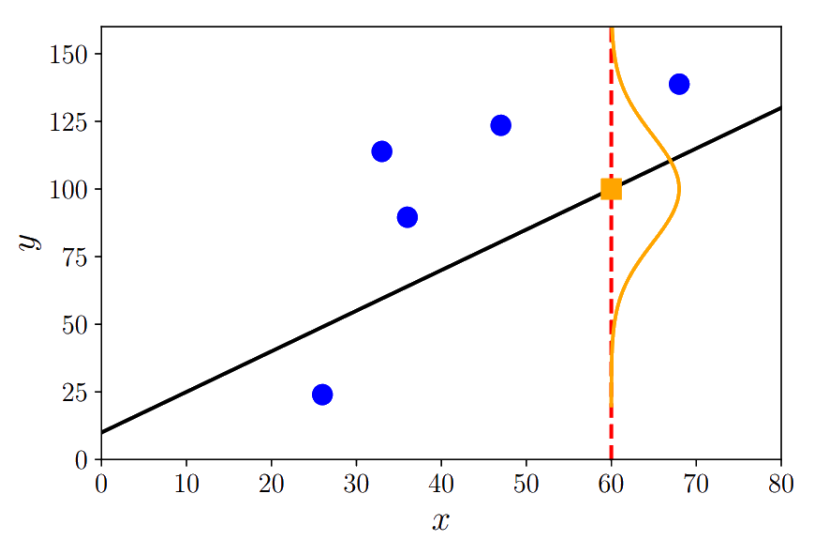

Independente da abordagem, deve-se buscar um modelo com parâmetros que minimizem o erro quando aplicados em um conjunto de dados novos (não usados no treinamento). Conceitualmente, este processo envolve três etapas:

1) *Seleção de modelo e ajuste dos hiperparâmetros* : Escolha de um modelo para representar os dados e escolha de parâmetros de controle que afetam a estrutura do modelo;


---


*Hiperparâmetro*: parâmetros que definem a estrutura do modelo mas que não são ajustados pelos dados de treinamento, mas sim definidos previamente. Exemplos: número de camadas em uma rede neural, formato para funções usadas no algoritmo, etc.


---


2) *Treinamento ou estimação de parâmetros* : Ajuste dos parâmetros do modelo com base em dados de treinamento;

3) *Previsão ou inferência* : Modelo já treinado é usado para prever a saída associada com novos dados (não usados no treinamento).




Por enquanto, vamos focar na etapa de **treinamento**. Esta etapa é essencialmente um *problema de otimização* onde alguma função erro deve ser minimizada.

Existem duas abordagens utilizadas para fazer este treinamento:

1) **Minimização do risco empírico** (mais utilizado para funções preditoras)

2) **Princípio da máxima verossimilhança** (mais utilizado para modelos probabilísticos)



##1.3) Minimização do Risco Empírico

###1.3.1) Função de perda



Vamos buscar uma **função preditora** que, com base em um conjunto de parâmetros $\mathbf{\theta}$ e em um vetor de atributos $\mathbf{x}_i$ seja capaz de prever a classe associada $y_i$:

$$
f(\mathbf{x}_i, \mathbf{\theta}) \approx y_i \qquad \qquad i =1,2,3, \ldots , N
$$

Por exemplo, esta função pode ser linear, gerando uma relação do tipo:

$$
f(\mathbf{x_i}) = \mathbf{\theta}^T \mathbf{x}_i + \theta_0
$$

Considere que o valor previsto por essa função seja igual a $\hat{y}_i$:

$$
f(\mathbf{x}_i, \mathbf{\theta}) = \hat{y}_i
$$

A diferença entre $y_i$ (valores reais) e $\hat{y}_i$ (valores previstos) pode ser usada para calcular o erro.



---


**Função de perda** $\ell(\hat{y}_i, y_i)$: função usada para mensurar o erro associado com cada amostra $i$.



---



**Objetivo**: Encontrar valores de $\mathbf{\theta}$ tal que a função de perda seja minimizada para o conjunto de dados de treinamento.

Exemplos de função de perda:

**Funções de perda mais usadas em regressão**

- *Erro absoluto*: $\qquad \ell(\hat{y}_i, y_i) = |\hat{y}_i - y_i|$

- *Erro quadrático*: $\qquad \ell(\hat{y}_i, y_i) = (\hat{y}_i - y_i)^2$

**Funções de perda mais usadas em classificação**

- *Hinge loss* (perda de articulação): $\qquad \ell(\hat{y}_i, y_i) =  max(0, 1-y_i\, \hat{y_i})$ (assume que os valores de $y_i$ estão entre -1 e +1)

- *Log loss* (perda logarítmica):  $\qquad \ell(\hat{y}_i, y_i) = - \left( y_i \log(pr(\hat{y}_i)) + (1 - y_i) \log(1 - pr(\hat{y}_i)) \right)$ (assume que os valores de $y_i$ estão entre 0 e +1 - importante para modelos probabilísticos!), onde $pr(\hat{y}_i)$ é a probabilidade da amostra ser da classa $y_i$.   

Obs: A *log loss* é um caso específico da função e perda *cross entropy*, válida para casos multiclasse. Para um problema contendo $C$ classes, a perda neste caso seria:

$\qquad \ell(\hat{y}_i, y_i) = - - \sum\limits_{j=1}^C y_{i,j} \log(pr(\hat{y}_{i,j}))$

onde $y_{i,j}$ é usualmente 1 caso a amostra $i$ pertença à classe 0 (one-hot encoding) e  $pr(\hat{y}_{i,j})$ é a probabilidade prevista para a amostra $i$ pertencer à classe $j$, calculada utilizando alguma distribuição de probabilidade.

###1.3.2) Estimativa do Erro Empírico



*Hipótese*: os elementos do conjunto de dados são independentes entre si, então, a média da das amostras (*média empírica*) é uma boa aproximação da média real:

$$
\hat{\ell} = \frac{1}{N} \sum\limits_{i=1}^N \ell(\hat{y_i},y_i)
$$

Como a função de perda depende tanto da função preditora $f (\mathbf{\theta}, x_i$) quanto dos dados utilizados, podemos definir uma **função de risco empírico**:
$$
\mathbf{R}_{emp}(f(\mathbf{\theta}, x_i), \mathbf{X}, \mathbf{y}) = \frac{1}{N} \sum\limits_{i=1}^N \ell(\hat{y_i},y_i)
$$

*Objetivo*: Obter valores de $\mathbf{\theta}$ que minimizem o risco empírico


*Problema*: Nesta forma, o erro é calculado com base nos próprios dados usados para obter $\mathbf{\theta}$, não trás informações sobre a capacidade de generalização.



---


**Generalização**: Capacidade do algoritmo desempenhar bem na classificação de dados novos, não usados no treinamento


---



###1.3.3) Estimativa do Erro Esperado



Como não temos acesso a um número infinito de amostras para elimiar a dependência do erro com as amostras, para estimar o **erro esperado** podemos separar os dados em conjuntos de **treinamento** e de **teste**, como comentado anteriormente.

Neste caso, o problema pode ser posto como:

1) Com base nos dados de treinamento, deve-se buscar os parâmetros $\theta_{min}$ que minimizem o risco empírico:

$$
\theta_{min} = \min_{\mathbf{\theta}} \,  \mathbf{R}_{emp} (f(\mathbf{\theta}, x_i), \mathbf{X}_{treino}, \mathbf{y}_{treino} )
$$

2) O erro esperado $\mathbf{R}_{exp}$ pode ser aproximado como o erro empírico avaliado com o conjunto de testes:

$$
\mathbf{R}_{exp} = \mathbf{R}_{emp} (f({\theta_{min}}, x_i), \mathbf{X}_{teste}, \mathbf{y}_{teste} )
$$

*Obs: Por enquanto, vamos desconsiderar a utilização de um grupo de validação!*

Para ilustrar o procedimento, vamos considerar inicialmente o classificador Perceptron clássico.

#2) Classificador Perceptron

##2.1) Definição

O classificador perceptron clássico é um algoritmo utilizado para classificar dados supondo uma **fronteira de separação linear**.

Por exemplo, considere os dados mostrados na figura abaixo:

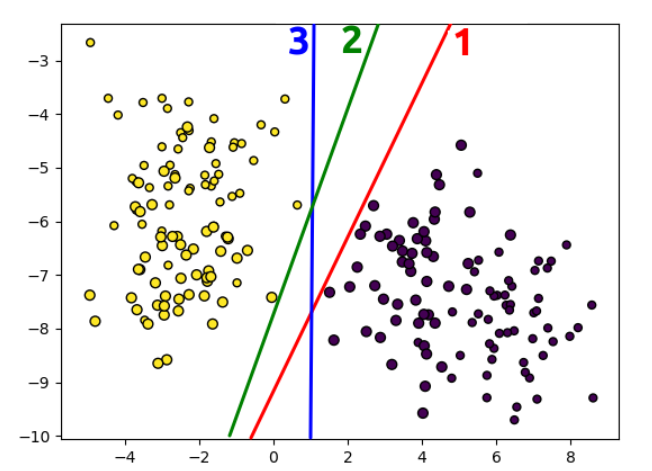

Pode-se facilmente separar estes dados usando uma função linear (uma reta nesse caso ou um hiperplano em dimensões maiores). Porém, como podemos encontrar a *melhor* fronteira de separação?




##2.2) Interpretação Geométrica

Para simplificar, vamos considerar um espaço de busca 2D dividido em duas regiões: **positiva** e **negativa**, separadas por uma reta (plano de separação).

Vamos considerar que o lado *positivo* corresponda à classe $y_i=1$ e o lado *negativo* à classe $y_i = 0$.

Vamos também definir um vetor $\mathbf{w} = (w_1, w_2)$ **normal** ao plano de separação.

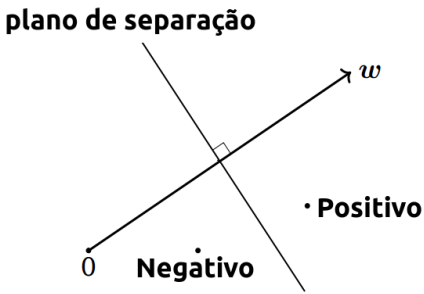

Considere agora um ponto $\mathbf{x}_i = (x_{i,1}, x_{i,2} )$ qualquer neste espaço. Se avaliarmos o **produto escalar** entre $\mathbf{x}_i$ e $\mathbf{w}$, teremos como resultado a **projeção ortogonal** de $\mathbf{x}_i$ sobre $\mathbf{w}$:

$$
\mathbf{x}_i \cdot \mathbf{w} = x_{i,1} w_1 + x_{i,2} w_2 = ||\mathbf{x}_i|| \, ||\mathbf{w}|| \cos(\theta)
$$
onde $||\mathbf{x}_i||$ representa a norma do vetor:

$$
||\mathbf{x}_i|| = \sqrt{x_{i,1}^2 + x_{i,2}^2}
$$

e $\theta$ é o ângulo entre os vetores.

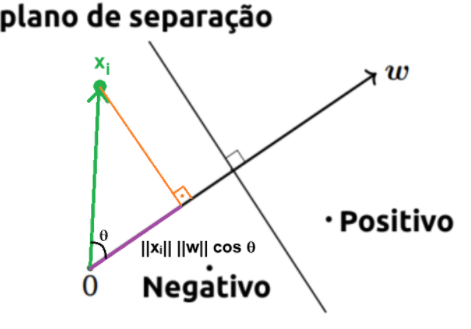

Observe que o produto escalar representa a distância da projeção de $\mathbf{x}_i$ na direção do vetor $\mathbf{w}$. Se essa distância for maior que um certo limite $C$, o ponto $\mathbf{x}_i$ irá cruzar o plano de separação.

Esse critério pode ser usado para se um dado ponto estará no lado positivo ou negativo:

- Se $\mathbf{x}_i \cdot \mathbf{w}  < C$, então $\mathbf{x}_i$ está na região negativa

- Se $\mathbf{x}_i \cdot \mathbf{w} >C$, então $\mathbf{x}_i$ está na região positiva.

Para facilitar a manipulação matemática, vamos reescrever essa relação passando a constante para o lado esquerdo e a defininindo como o **parâmetro de viés** $b$ (*bias*):

- Se $\mathbf{x}_i \cdot \mathbf{w} + b  < 0$, então $\mathbf{x}_i$ está na região negativa

- Se $\mathbf{x}_i \cdot \mathbf{w} + b \geq 0$, então $\mathbf{x}_i$ está na região positiva.


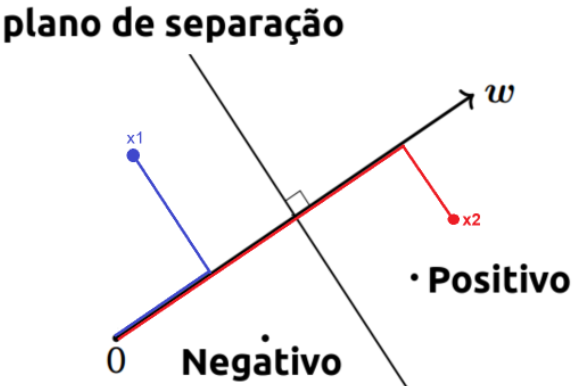

Como vimos anteriormente, os dados amostrais consistem em $N$ pares de vetores $\mathbf{x}_i$ contendo os atributos e a respectiva classe $y_i$:

$$
T = ((\mathbf{x}_1, y_1), (\mathbf{x}_2, y_2), (\mathbf{x}_3, y_3), \ldots, (\mathbf{x}_N, y_N))
$$

Com base nos vetores de atributos $\mathbf{x}_i$, podemos determinar se o ponto estará no lado *postivo* ($y_i = 1$) ou no lado *negativo* ($y_i=0$) do plano de separação:

- Se $\mathbf{x}_i \cdot \mathbf{w} + b  < 0$, então $y_i = 0$;

- Se $\mathbf{x}_i \cdot \mathbf{w} + b \geq 0$, então $y_i = 1$.

O termo $\mathbf{x}_i \cdot \mathbf{w} + b$ resulta em um escalar contínuo e não binário. Para transformar este valor contínuo em binário, podemos utilizar ele como argumento da **função de Heaviside**. Essa função é definida para um valor de $x$ qualquer como:
$$
h(x) = \begin{cases}
0 & \text{se } x < 0, \\
1 & \text{se } x \geq 0.
\end{cases}
$$

Com isso, podemos definir que a classe prevista para um vetor de atributos $\mathbf{x}_i$ será:
$$
\boxed{\hat{y}_i = h(\mathbf{x}_i \cdot \mathbf{w} + b)}
$$


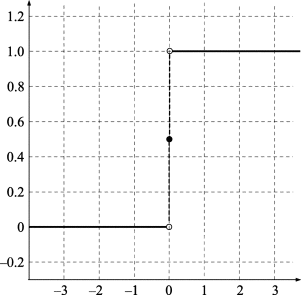

##2.3) Interpretação Algébrica



O perceprton simples pode ser interpretado como uma *rede neural* contendo somente um elemento.

De maneira geral, uma rede neural é um algoritmo que relaciona dados de entrada com dados de saída através da soma e multiplicação dos dados de entrada por parâmetros **peso** e pela aplicação de uma **função de ativação**.

Considere o exemplo ilustrado a seguir. Neste caso temos:

1) Atributos de entrada: $x_1, x_2, \ldots x_m$

2) Pesos $\omega_1, \omega_2 \ldots \omega_m$

3) Parâmetro de viés $b$

O somatório irá calcular a soma do produto entre os atributos e os pesos correspondentes e o parâmetro de viés:

$$
\Sigma = b + \omega_1 x_1 + \omega_2 x_2 + \ldots + \omega_m x_m
$$

Observe que se definirmos vetores $\mathbf{x}_i = (x_1, x_2, \ldots x_m)$ e $\mathbf{w} = (\omega_1, \omega_2, \ldots \omega_m)$, esta operação equivale exatamente a:

$$
\Sigma = \mathbf{x}_i \cdot \mathbf{w} + b
$$


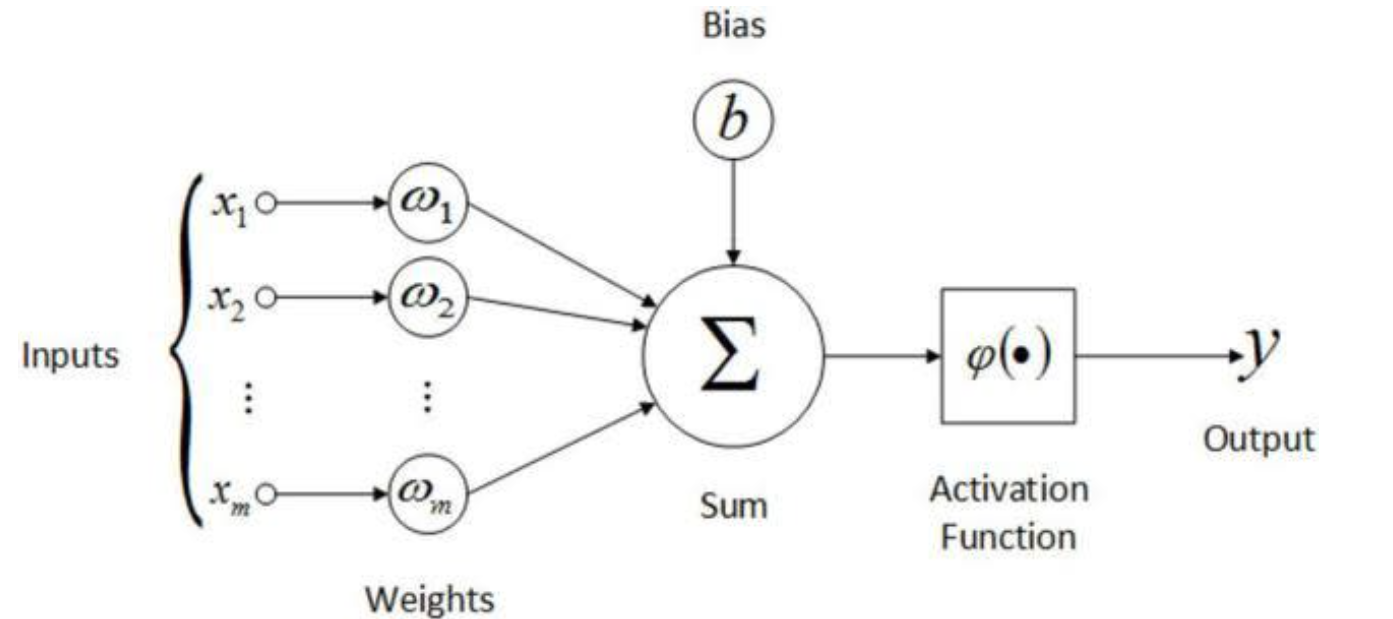


Este valor será um escalar contínuo, então, para transformá-lo em um valor binário para classificação, podemos utilizar uma **função de ativação** $\varphi(\Sigma)$.

Supondo uma fronteira de separação linear, a princípio qualquer função linear (ou linear por partes) que receba como arugmento de entrada $\Sigma$ e retorne 0 ou 1 pode ser aplicada, como por exemplo a *função de Heaviside* apresentada anteriormente:

$$
\varphi(\Sigma) = \begin{cases}
0 & \text{se } \Sigma < 0, \\
1 & \text{se } \Sigma \geq 0.
\end{cases}
$$

Como resultado desta operação, teremos a classe prevista para a amostra:

$$
\boxed{\hat{y}_i = h(\Sigma) = h(\mathbf{x}_i \cdot \mathbf{w} + b)}
$$

##2.4) Obtenção dos Parâmetros

Agora que temos uma **função preditora**, devemos determinar os valores dos parâmetros peso $\mathbf{w}$ e viés $b$ que gerem a melhor classificação possível.

Inicialmente, precisamos definir uma *função de perda*. Neste caso, vamos considerar a função *hinge* definida anteriormente:
$$
\ell(\hat{y}_i, y_i) = max(0, 1-y_i\, \hat{y_i})
$$

**Obs.:** Essa função assume que as classes são divididas em $-1$ e $+1$!

Neste algoritmo, os parâmetros são ajustados da seguinte forma:


---



1) Os parâmetros são inicializados com um valor arbirtrário



---


2) Usando a função preditora, os valores de $\hat{y}_i$ são calculados para cada elemento do conjunto de treinamento

---

3) Com base em $\hat{y}_i$ e $y_i$, a função de perda $\ell(\hat{y}_i, y_i)$ é calculada


---



4) Os parâmetros são atualizados da seguinte forma.
Se $\ell(\hat{y}_i, y_i) > 0$, então:

$$
\mathbf{w} = \mathbf{w} + r \, y_i\, \mathbf{x}_{i}
$$
$$
b = b + r \,y_i
$$

onde $r$ é a **taxa de aprendizado**. Este valor usualmente é definido como um positivo menor que 1 para auxiliar na convergência. Este processo é aplicado para as $N$ amostras no grupo de treino (utilizando o último valor calculado para os parâmetros para calcular a atualização da próxima amostra)

Assim, se $y_i = 1$ ou $y_i= -1$, isso irá determinar para que direção a inclinação e a posição do plano de separação devem ser alterados.



---



5) Após os parâmetros serem atualizados com todas as amostras, o processo é repetido novamente, atualizando sobre todas as amostras. Isso é então repetido até um certo número de iterações ser atingido ou o erro ser suficientemente baixo.

**Obs.:** Apesar de simples, pode-se provar que esse procedimento será convergente desde que os dados sejam linearmente separáveis.

# 3) Implementação

Para ilustrar a implementação, vamos primeiramente criar uma **classe** que implementa o algoritmo perceptron.

In [ ]:
import numpy as np

#Criando uma classe chamada Perceptron para fazer a classificação
#Para mais detalhes sobre o funcionamento de classes https://docs.python.org/3/tutorial/classes.html
class Perceptron:
    def __init__(self, learning_rate, n_iters):
        # __init__ é um construtor usado para inicializar os atributos
        # self é um argumento usado para se referir à instância atual da classe, cada vez que ela é chamada é criada uma instância nova
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.loss_history = [] #Variável criada para armazenar a função de perda ao longo das épocas (epoch)

    #Definindo a função de Heaviside
    def heaviside(self, z):
        #Função de ativação Heaviside (com saída -1 ou +1 para estar de acordo com a hinge loss)
        return np.where(z >= 0, 1, -1)

    #Definindo a função de perda hinge loss
    def hinge_loss(self, y_true, y_pred):
        #Função de perda Hinge loss
        return max(0, 1 - y_true * y_pred)

    #Procedimento para ajustar os parâmetros
    #Método 'fit': Funções definidas dentro de classes e que podem ser acessadas depois costumam ser chamadas de 'métodos'!
    def fit(self, X, y):
        n_samples, n_features = X.shape #Número de amostras e de atributos

        # Inicializando os pesos com zeros (mesma dimensão que os atributos)
        self.weights = np.zeros(n_features)
        self.bias = 0

        #Iniciando o processo iterativo: iterando até o número máximo definido pelo usuário
        for _ in range(self.n_iters): #Obs.: for _ in especifica o número de vezes a ser rodado sem depender de uma variável
            total_loss = 0  #Para acumular a perda total da época
            #Repetindo o procedimento para todas as amostras
            for i in range(n_samples):
                x_i = X[i] #para facilitar a sintaxe, acessando a amostra i

                #Calculando o produto escalar do vetor dos parâmetros com o ponto x_i e somando o viés
                sum = np.dot(x_i, self.weights) + self.bias

                #Prevendo a classe de saída usando a função de heaviside
                y_predicted = self.heaviside(sum)

                #Calculando a função perda para a amostra
                loss = self.hinge_loss(y[i], y_predicted)
                total_loss += loss

                #Se o valor calculado for diferente do real, atualizar os parâmetros
                if loss > -0.001: #Valor um pouco menor que zero para evitar problemas de estabilidade numérica
                    #Atualizar os pesos e o bias
                    #update = valor que será atualizado os parâmetros, levando em conta o sinal associado com a classe y[i]
                    update = self.learning_rate * (y[i])
                    self.weights += update * x_i
                    self.bias += update

           # Calcular a média da perda após cada época
            avg_loss = total_loss / n_samples
            self.loss_history.append(avg_loss)  # Armazenar a média da perda

    #Criando uma função 'predict' para prever a classe de novas amostras
    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.heaviside(linear_output)
        return y_predicted

    #############################################################################
    ############  Funções adicionais para visualização do processo ##############
    #############################################################################

    #1) Plotando os pontos e a fronteira de separação
    def plot_decision_boundary(self, X, y):
        # Plotar os dados
        plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c ='r', s=20 , label='Classe 1')
        plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], c ='b', s=20, label='Classe -1')

        # Plotar a linha de separação
        # Ajuste linear feito com base nos coeficientes
        x_min, x_max = X[:, 0].min(), X[:, 0].max()
        y_min = (-self.weights[0] * (x_min) - self.bias) / self.weights[1]
        y_max = (-self.weights[0] * x_max - self.bias) / self.weights[1]

        plt.plot([x_min, x_max], [y_min, y_max], color='green', linestyle='--', label='Linha de Separação')

        plt.xlabel('Atributo 1')
        plt.ylabel('Atributo 2')
        plt.legend()
        plt.title('Perceptron - Linha de Separação')
        plt.show()

    #2) Plotando a média da função de perda ao longo de cada época (iteração sobre todas as amostras)
    def plot_loss(self):
        plt.plot(self.loss_history, color='purple')
        plt.xlabel('Épocas')
        plt.ylabel('Média da Perda')
        plt.title('Perda Média por Época')
        plt.show()


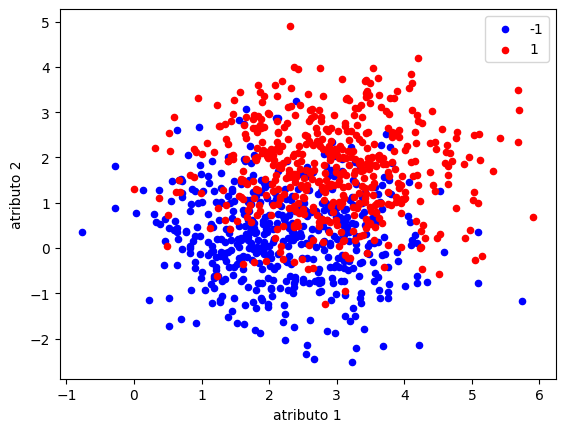

In [ ]:
#Criando dados aleatórios para demonstração

import matplotlib.pyplot as plt
#Importando a função make_blobs, que gera dados aleatórios
from sklearn.datasets import make_blobs
#Importaando também a make_classification para teste posterior
from sklearn.datasets import make_classification
#Bibliotecas para divisão treino/teste e normalização
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

seed = 65 #Exemplos: 11 - bem separados, 65 - bem misturados, 2 - menos separados
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, center_box=(0, 10), random_state=seed)

#Gerando com a make_classification, para comparação
#X,y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=2, random_state=seed, n_clusters_per_class=1)

#Transformando as classes de (0,1) padrão do make_blobs para (-1,1) para poder usar a função de perda hinge loss
y = np.where(y <= 0, -1, 1)

#Plotando os pontos para visualização
plt.scatter(X[:, 0][y == -1], X[:, 1][y == -1], c='b',s=20, label='-1')
plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1], c='r',s=20, label='1')
plt.xlabel('atributo 1') #Nomeando o eixo x de acordo com os nomes definidos na tabela de dados
plt.ylabel('atributo 2') #Nomeando o eixo y de acordo com os nomes definidos na tabela de dados
plt.legend() #Mostrar legenda
plt.show() #Mostrar gráfico
plt.show()

#Normalizando entre -1 e +1
scaler = MinMaxScaler(feature_range = (-1,1)) #definindo o intervalo entre -1 e 1, para manter o mesmo que as classes
X_norm = scaler.fit_transform(X) #Normalizando os dados da matriz X e alocando em uma nova variável

#Divivindo em grupos de teste e treinamento
test_group_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=test_group_size, random_state=seed)


Pesos ajustados: [16857.30513463 32300.21730857]
Bias ajustado: 1600.0000000002267


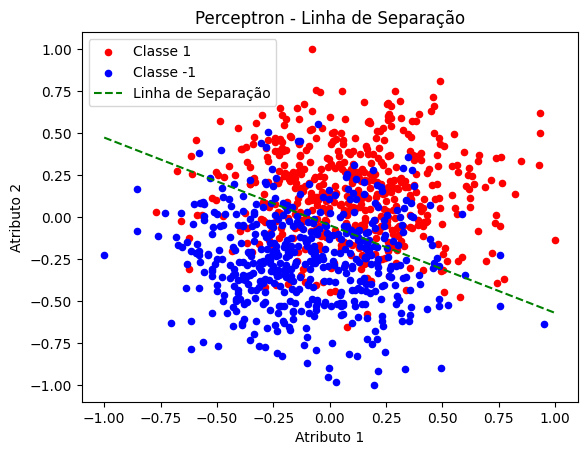

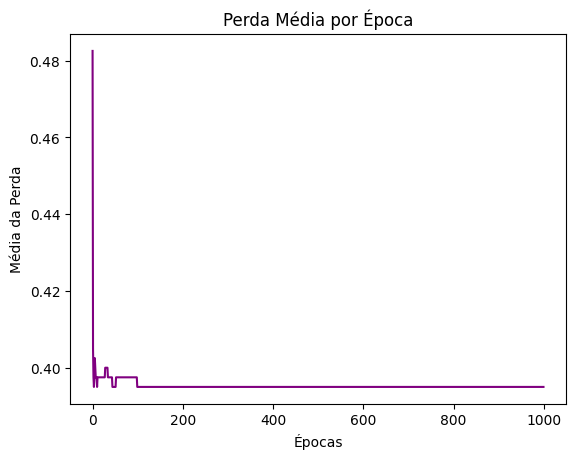

In [ ]:
#Aplicando o algoritmo nos dados gerados
#Chamando a classe e definindo os parâmetros de entrada
perceptron = Perceptron(learning_rate=0.2, n_iters=1000)

#Usando a função .fit definida na classe para treinar o modelo
perceptron.fit(X_train, y_train)

#Usando a função .predict para prever a classe dos dados de teste
predictions = perceptron.predict(X_test)

#Imprimindo os parâmetros, para visualização
print("Pesos ajustados:", perceptron.weights)
print("Bias ajustado:", perceptron.bias)

#Fazendo os gráficos da fronteira de decisão e da função perda
perceptron.plot_decision_boundary(X_norm, y)
perceptron.plot_loss()

[[84 20]
 [22 74]]
precision = 0.7872340425531915 recall =  0.7708333333333334 acurácia =  0.79


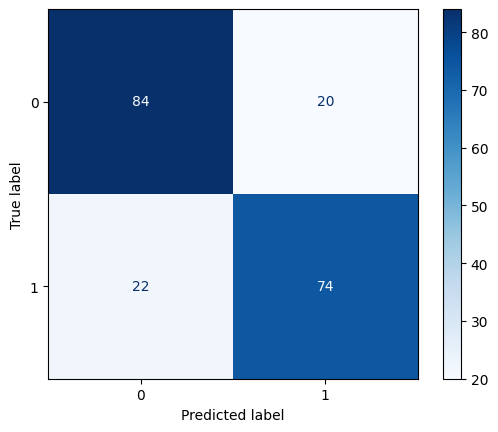

In [ ]:
#Métricas de Análise
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay #Pacote para visualização da cm

cm = confusion_matrix(y_test, predictions) #matriz gerada com base nos valores reais (y_test) e nos previstos (predictions)
print(cm)

#plotando a confusion matrix de maneira visualmente mais agradável!
ConfusionMatrixDisplay(cm).plot(cmap='Blues');

#Calculando a acurácia, precisão e o recall para as amostras
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, predictions)
prc = precision_score(y_test, predictions)
rec = recall_score(y_test, predictions)
print('precision =' ,prc, 'recall = ', rec, 'acurácia = ', acc)



#4) k-Vizinhos Mais Próximos

**Estratégia Geral**: Determinar a classe de um ponto $\mathbf{x}_i$ com base na classe dos $k$ vizinhos mais próximos.

A classificação pode ser feita usando a própria distância (euclidiana) entre os pontos. Por exemplo, o algoritmo 1-NN ($k=1$) vai atribuir ao ponto  $\mathbf{x}_i$ a classe do vizinho mais próximo.





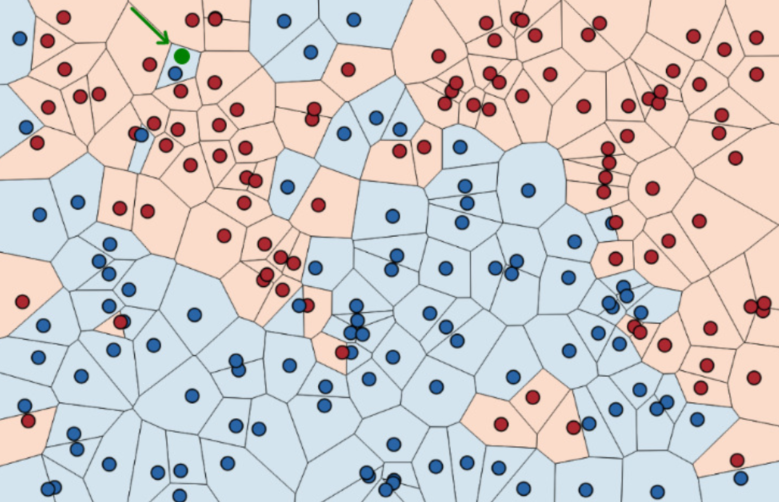

Usualmente, usar $k=1$ leva a um baixo desempenho pois o algoritmo fica muito sucetível a ruídos nos dados. Uma melhor estratégia é fazer uma média entre os $k$ vizinhos mais próximos.

Se um valor muito alto de $k$ for utilizado, a fronteira de separação pode não ser clara. Usualmente, um valor de $k$ ~ $5-7$ gera resultados razoáveis.



---



Para determinar a classe associada com um ponto $\mathbf{x}_i$ do conjunto de teste, as etapas envolvidas são as seguintes:

1) Armazenar os dados do conjunto de treino $X_{tr} = (\mathbf{x}^{tr}_1, \mathbf{x}^{tr}_2, \ldots, \mathbf{x}^{tr}_m)$ (não é necessário ajustar nenhum parâmetro neste caso);

2) Calcular a distância entre o ponto $\mathbf{x}_i$ e os pontos do conjunto de treino:

$$
dist(j) = ||\mathbf{x}_i - \mathbf{x}^{tr}_j||
$$

Considerando que cada ponto tenha $D$ atributos ($\mathbf{x}_i = (x_{i,1}, x_{i,2}, x_{i,3}, \ldots, x_{i,D})$)

$$
dist(j) = \sqrt{\sum\limits_{k=1}^D (x_{i,k} - x^{tr}_{i,k})^2}
$$

3) Organizar os pontos em ordem crescente de distância

4) Determinar a classe dos $k$ vizinhos mais próximos do ponto classificado. A classe mais comum entre os vizinhos é escolhida como sendo a classe prevista para o ponto